In [18]:
from utils import simulate, phase_portrait, phase_graph
from numpy import linspace
from matplotlib.pyplot import *
rc('text', usetex=True)

## **Applied Nonlinear Control:**
### **Lecture 4: Invariant Set, Lassalle Principle, Region of Attraction, Convergence Rates**

## **Invariant Set Theorems**

In practice we are always interested in the regions in which system is tend to stay forever, it may be stable equalibrium, the error funel etc. However the vannila Lyapunov theory does not directly allow us to find such regions. Here we can use the help of the powerful **invariant set theorems**, attributed
to **La Salle** as **invariance principle**.  



The central concept in these theorems is that of **invariant set**

--- 

***A set $\mathcal{G}$ is an invariant set for a dynamical system if every system
trajectory which starts from a point in  $\mathcal{G}$ remains in $\mathcal{G}$ for all future time***

$$
    \mathbf{x}(0) \in \mathcal{G} \Rightarrow \mathbf{x}(t) \in \mathcal{G}, \forall t \in \mathbb{R} 
$$

---

A particular examples of invariant sets are, equilibria, limit cycles, energy level sets of conservative system and any particular solution of ODE.

In practice we will often use the notion of positively invariant set: 

--- 

***A set $\Omega$ is said be positively invariant set with respect to $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x})$ if:***

$$
    \mathbf{x}(t_0) \in \mathcal{G} \Rightarrow \mathbf{x}(t) \in \mathcal{G}, \forall t \geq t_0 
$$

---

Sometimes one use the forward invariant set, or just invariant set, all of these notions are synonymous 


In most cases, it is impractical to directly verify that a set is forward invariant or to construct forward invariant sets by examining all of the trajectories of a system. Instead, if a system has continuous solutions, we can evaluate if a set is forward invariant by checking that trajectories never leave the set through its boundary. We do this by comparing the angle between the dynamics $\mathbf{f}$ and the normal to the set’s boundary. 

Yet again the Lyapunov functions provide a convenient tool to estimate the boundaries of invariant sets. One can easily find the the boundaries of invariance set $\Omega$ defined as $\partial \Omega$ by looking on such region $\{\mathbf{x}:\mathbf{V}(\mathbf{x})=c\}$ where $\dot{V}(\mathbf{x}) < 0$


For instance consider the following dynamical system:
\begin{equation*}
    \begin{cases}
        \dot{x}_1 = x_2 - x^7_1(x^4_1 + 2x^2_2 - 10)\\ 
        \dot{x}_2 = -x^3_1 - 3 x^5_2(x^4_1 +2 x_2 - 10)
    \end{cases}
\end{equation*}

The set defined by $x_1^4 + 2 x_2^2 = 10$ is invariant since:

\begin{equation*}
    \frac{d}{dt}(x_1^4 + 2 x_2^2 - 10) = -(4x^{10}_1 + 12 x^6_2)(x_1^4 + 2 x_2^2 - 10)
\end{equation*}

which is zero on the set.

Is this set is attractive?

### **Local Invariant Set Theorem**

Consider an autonomous system, with $\mathbf{f}$ continuous, and let $V(\mathbf{x})$ be a scalar function with continuous
first partial derivatives. Assume that:

* for some $r>0$ the region $\Omega_r$ defined by $V(\mathbf{x})<r$ is bounded 
* $\dot{V}(\mathbf{x}) \leq 0$ for all $\mathbf{x} \in \Omega_r$ 

Let $\mathcal{R}$ be the set of all points within $\Omega_r$ where $\dot{V}(\mathbf{x})=0$, and $\mathcal{M}$ be the largest invariant set in $\mathcal{R}$. Then, every solution $\mathbf{x}$ originating in $\Omega_r$ tends to $\mathcal{M}$ as $t \rightarrow \infty$

### **Global Invariant Set Theorem**

Consider an autonomous system, with $\mathbf{f}$ continuous, and let $V(\mathbf{x})$ be a scalar function with continuous
first partial derivatives. Assume that:
* $V$ is radially unbounded, $V(\mathbf{x}) \rightarrow \infty$ as $\| \mathbf{x} \|\rightarrow \infty$ 
* $\dot{V}(\mathbf{x}) \leq 0$ for all $\mathbf{x}$ 

Let $\mathcal{R}$ be the set of all points where $\dot{V}(\mathbf{x})=0$, and $\mathcal{M}$ be the largest invariant set in $\mathcal{R}$. Then, every solution $\mathbf{x}$ converge to $\mathcal{M}$ as $t \rightarrow \infty$


Now one can comeback to the example: 
\begin{equation*}
    \begin{cases}
        \dot{x}_1 = x_2 - x^7_1(x^4_1 + 2x^2_2 - 10)\\ 
        \dot{x}_2 = -x^3_1 - 3 x^5_2(x^4_1 +2 x_2 - 10)
    \end{cases}
\end{equation*}

Let us apply both global and local invariant set theorems.


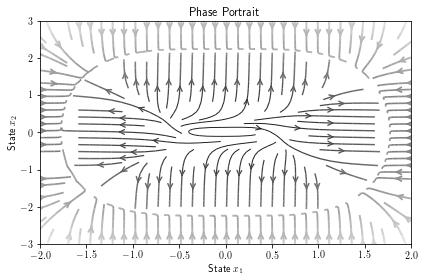

In [19]:
def f(x,t):
    x1, x2 = x
    dx1 = x2 - x1**7 * (x1**4 +2*x2**2 - 10)
    dx2 = -x1**3 - 3*x2**5 * (x1**4 +2*x2**2 - 10)
    return dx1, dx2

phase_portrait(f, x_range = [2, 3], density = 1.2)


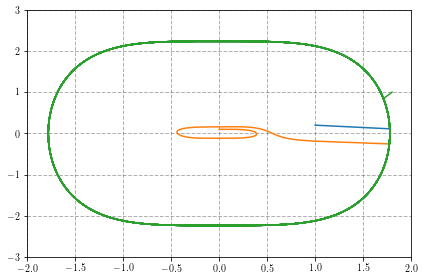

In [20]:

x = simulate(f, [[1,0.2],[0,0.1], [1.8,1.0]], 0, 30, 1000)

for solution in x:
    plot(solution[:,0], solution[:,1])    
xlim([-2, 2])
ylim([-3, 3])
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
grid(True)
tight_layout()
show()

Consider now the familiar nonlinear pendulum:
\begin{equation*}
    \ddot{\theta} + \dot{\theta} + \sin \theta = 0 
\end{equation*} 

with Lyapunov candidate:
\begin{equation*}
    V(\theta,\dot{\theta}) = \frac{1}{2}\dot{\theta}^2 + 1 - \cos{\theta}
\end{equation*} 

the derivative is equal to:
\begin{equation*}
    \dot{V}(\dot{\theta}) = -\dot{\theta}^2
\end{equation*} 

which is N.S.D, thus we can't conclude the stability just based on Lyapunov arguments. However noting that the largest invariant set in
$\dot{V} = 0$ for some predefined energy level $V < E_0$ is in fact in origin, one may deduce the convergence of the system at least locally.     

### **Stability with semi-definite Derivative**

Consider the autonomous system, with $\mathbf{f}$ continuous, and let $V(\mathbf{x})$ be
a scalar function with continuous partial derivatives. Assume that in a certain
neighborhood $\Omega$ of the origin:

* $V(\mathbf{x})$ is positive definite. 
* $\dot{V}(\mathbf{x}) \leq 0$
* the set $\mathcal{R}$ defined by $\dot{V}(\mathbf{x}) = 0$ contains no trajectories other then trifial $\mathbf{x} = 0$  

Then, the equilibrium point $0$ is asymptotically stable. Furthermore, the largest
connected region of the form $\Omega_l$ (defined by $V(\mathbf{x}) < l$) within $\Omega$ is a domain of
attraction of the equilibrium point.


The above corollary replaces the negative definiteness condition on $\dot{V}$ in Lyapunov's local asymptotic stability theorem by a negative semi-definiteness condition on $\dot{V}$, combined with a third condition on the
trajectories within $\mathcal{R}$.

The largest connected region of the form $\Omega_l$ within $\Omega$ is a domain of attraction of the equilibrium point, but not necessarily the whole domain of attraction, because the function $V$ is not unique. The set $\Omega$ itself is not necessary domain of attraction since it is not invarient. 

### **Estimating Regions of Attraction**

Let us consider familiar system:

\begin{equation*}
    \dot{x} = -x + x^3
\end{equation*}



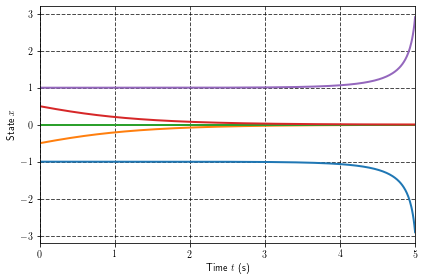

In [21]:
def f(x,t):
    return -x+x**3

x_sol = simulate(f, [-1.00002, -0.5, 0, 0.5, 1.00002], tf=5, show_plot=True)


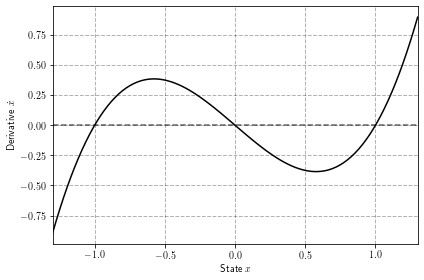

In [22]:
dx = phase_graph(f, x_range=[-1.3,1.3])

Let us define the simplest Lyapunov candidate:

In [23]:
from sympy import Matrix, symbols, solve, simplify
from sympy import simplify

x = symbols('x', real = True)
V = x**2 /2
print(f'Lyapunov candidate:')
V


Lyapunov candidate:


x**2/2

In [24]:
dV = V.diff(x)*f(x,0)
print(f'Time derivative of candidate:')
simplify(dV)

Time derivative of candidate:


x**4 - x**2

In [25]:
from sympy.solvers.inequalities import reduce_rational_inequalities
reduce_rational_inequalities([[dV<=0]], x)

(-1 <= x) & (x <= 1)

Consider now the following system:
\begin{equation*}
    \begin{cases}
        \dot{x}_1 = x_2\\ 
        \dot{x}_2 = -x_1+\frac{1}{3}x^3_1 - x_2
    \end{cases}
\end{equation*}

In [26]:
def f(x,t):
    x1, x2 = x
    dx1 = x2
    dx2 = -x1 +x1**3/3 - x2
    return dx1, dx2


And choose Lyapunov candidate as follows:
\begin{equation*}
    V(\mathbf{x}) = \frac{3}{2}x^2_1 - \frac{1}{6}x^4_1 + x_1 x_2+x^2_2
\end{equation*}

What are the region of attraction?

In [27]:
from sympy import simplify, Matrix
x = symbols('x_1, x_2', real = True)
V_symb = x[0]**2 *3/2 - x[0]**4/6 +x[0]*x[1] +x[1]**2
print(f'Lyapunov candidate:')
V_symb

Lyapunov candidate:


-x_1**4/6 + 3*x_1**2/2 + x_1*x_2 + x_2**2

In [28]:
Matrix(f(x,0))

Matrix([
[                 x_2],
[x_1**3/3 - x_1 - x_2]])

In [29]:
grad_V = Matrix([V_symb]).jacobian(x)
dV = (grad_V @ Matrix(f(x,0)))[0]
print(f'Time derivative of candidate:')
simplify(dV)

Time derivative of candidate:


x_1**4/3 - x_1**2 - x_2**2

As you can see conditions of local stability are satisfied in domain $\mathcal{D} = \{\mathbf{x} : |x_1|\leq\sqrt{3}\}$, does that mean **that system will be stable in $\mathcal{D}$, i.e. it is region of attraction?** 

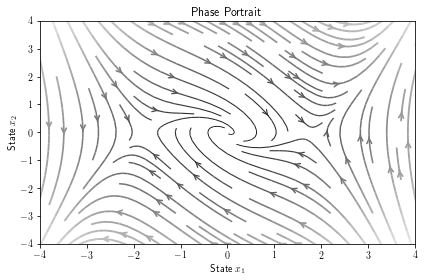

In [30]:
phase_portrait(f, x_range=[4, 4], density=1) 

In view on this example it is not difficult to see why not any set $\mathcal{D}$ on which conditions for local stability is the region of attraction. Even though a trajectory starting in $\mathcal{D}$ will move from Lyapunov surface $V(\mathbf{x})=c_1$ to $V(\mathbf{x})=c_2$ with $c_1<c_2$, there is no guarantee that trajectory will remain forever in $\mathcal{D}$  

### **Robustness analysis**

Let's consider the same one-dimensional example used above, but add an uncertain parameter into the dynamics. In particular, consider the system:

$$
  \dot{x} = -x + \alpha x^3, \quad \frac{3}{4} < \alpha < \frac{3}{2}
$$


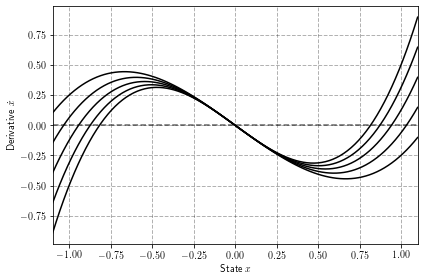

In [31]:
x_range = [-1.1,1.1]
x = linspace(x_range[0], x_range[1], 100)

figure(figsize=(6, 4))

for alpha in linspace(3/4,3/2,5):        
    dx = -x + alpha*x**3
    plot(x, dx, color='k')
xlabel(r'State  $x$')
ylabel(r'Derivative  $\dot{x}$')
hlines(0, x_range[0], x_range[1], color='k', linestyle='--', alpha=0.6)
xlim([x_range[0], x_range[1]])
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
grid(True)
tight_layout()
show()

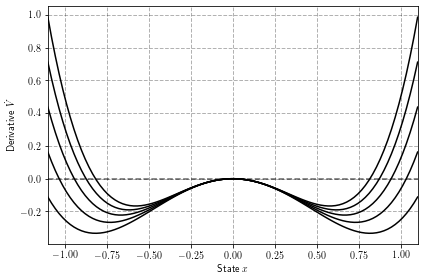

In [32]:

figure(figsize=(6, 4))

for alpha in linspace(3/4,3/2,5):       
    dx = -x + alpha*x**3
    plot(x, dx*x, color='k')
xlabel(r'State  $x$')
ylabel(r'Derivative $\dot{V}$')
hlines(0, x_range[0], x_range[1], color='k', linestyle='--', alpha=0.6)
xlim([x_range[0], x_range[1]])
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
grid(True)
tight_layout()
show()

Taking the same Lyapunov candidate:

In [33]:
x = symbols('x', real = True)
alpha = symbols(r'\alpha', real = True, positive = True)
V = x**2 /2
print(f'Time derivative of candidate:')

dV = V.diff(x)*(-x+alpha*x**3)
simplify(dV)


Time derivative of candidate:


\alpha*x**4 - x**2

In [34]:
print(f'The region of attraction is given by:')
reduce_rational_inequalities([[dV<=0]], x)

The region of attraction is given by:


((0 < x) & (x <= 1/sqrt(\alpha))) | ((x <= 0) & (-1/sqrt(\alpha) <= x))

### **Convergence Rates**

One can use tha Lyapunov like arguments to deduce not only stability but the **convergence rates** for trajectories, let us consider the real function $V(t)$ that satisfy inequality:
$$
    \dot{V}(t) + \alpha V(t)\leq0
$$
where $\alpha$ is real number, then:
$$
    V(t) \leq V(0)e^{-\alpha t}
$$

Thus one can estimate speed of convergence for system trajectories just by finding apropriate $V$

### **Control Design Based on Lyapunov's Direct Method**

Previously we have used Lyapunov's direct method for system analysis. In doing the analysis, we have implicitly presumed that certain control laws have been chosen for the systems. 

However, in many control problems, the **actual task** is to find an **appropriate control law** for a given plant. In the following, we briefly discuss how to apply Lyapunov's direct method for designing stable control
systems. 

Most of the controller design methods we will describe in later classes are actually based on Lyapunov concepts.


There are basically two ways of using Lyapunov's direct method for control design, and both have a trial and error flavor:

* The first technique involves **hypothesizing one form of control law** and then finding a Lyapunov function to justify the choice. 
* The second technique, conversely, requires **hypothesizing a Lyapunov
function** candidate and then finding a control law to make this candidate a real
Lyapunov function.

Consider the problem of stabilizing the system:

\begin{equation*}
    \ddot{x} - \dot{x}^3 + x = u 
\end{equation*}

We are looking for controller in form: 
\begin{equation*}
    u(x,\dot{x}) 
\end{equation*}

Let us choose Lyapunov candidate:
\begin{equation*}
    V = \frac{1}{2}x^2 + \frac{1}{2}\dot{x}^2
\end{equation*}

Now one can deduce the control law that will stabilize the system!

Assume now that you have the very same equation but with some uncertainty:

\begin{equation*}
    \ddot{x} + p\dot{x}^3 + x + \delta = u 
\end{equation*}
where $|p|\leq p_{max}$ and $\delta<|\delta_{max}|$

try to use Lyapunov tools to design the robust controller that will stabilize the system above for whatever $\delta$ and $p$ 